In [22]:
import pandas as pd
import numpy as np
import warnings as wn

wn.simplefilter( "ignore" )

In [23]:
loc_lbl = r"D:\FacundoTorraca\Documents\TP2_Machine_Learning\Labels"

In [24]:
loc_ftr = r"D:\FacundoTorraca\Documents\TP2_Machine_Learning\Features\ftr_ins"

In [25]:
ins_lb = pd.read_csv( loc_lbl + "\\ins_lb.csv", dtype = {"obs_18_20":"bool", "obs_21_23":"bool", "obs_24_26":"bool"} )

### Filtro de manera que tenga los datos necesarios

In [26]:
rh_18_20 = pd.read_csv( "D:\FacundoTorraca\Documents\TP2_Machine_Learning\Training Sets\ins_18_20.csv" ); rh_18_20 = rh_18_20["ref_hash"].drop_duplicates().tolist()
rh_21_23 = pd.read_csv( "D:\FacundoTorraca\Documents\TP2_Machine_Learning\Training Sets\ins_21_23.csv" ); rh_21_23 = rh_21_23["ref_hash"].drop_duplicates().tolist()

In [27]:
set_trn = ins_lb.loc[ ins_lb["ref_hash"].isin( rh_18_20 ), ["ref_hash", "21_23_sc", "obs_21_23"] ]
set_tst = ins_lb.loc[ ins_lb["ref_hash"].isin( rh_21_23 ), ["ref_hash", "24_26_sc", "obs_24_26"] ]

t_lim = 259200; max_t = 3800
set_trn_loc = pd.concat( [ set_trn.loc[ set_trn["21_23_sc"] < t_lim ], set_trn.loc[ set_trn["21_23_sc"] == t_lim ].reset_index( drop = True ).loc[: max_t] ], axis = 0 ).sample(frac=1).reset_index(drop=True)
set_tst_loc = pd.concat( [ set_tst.loc[ set_tst["24_26_sc"] < t_lim ], set_tst.loc[ set_tst["24_26_sc"] == t_lim ].reset_index( drop = True ).loc[: max_t] ], axis = 0 ).sample(frac=1).reset_index(drop=True)

### Creamos los Train/Test

In [28]:
Z = set_tst[ ["ref_hash"] ] #Datos test
W = set_tst[ ["ref_hash","24_26_sc", "obs_24_26"] ] #Label test

In [29]:
X = set_trn[ ["ref_hash"] ] #Datos train
Y = set_trn[ ["ref_hash","21_23_sc", "obs_21_23"] ] #Label train

In [30]:
Z_loc = set_tst_loc[ ["ref_hash"] ] #Datos test reducido
W_loc = set_tst_loc[ ["ref_hash","24_26_sc","obs_24_26"] ] #Label test reducido

In [31]:
X_loc = set_trn_loc[ ["ref_hash"] ] #Datos train reducido
Y_loc = set_trn_loc[ ["ref_hash","21_23_sc","obs_21_23"] ] #Label train reducido

# <span style="color:orange">  Preparo los datos para predecir </span>
Con los datos 21-23 predecimos "24-26_sc"

In [260]:
Z_var = Z_loc
W_var = W_loc

### Agregamos los features 

In [261]:
ftr_01_Z = pd.read_csv( loc_ftr + "\\sin_hour_21_23.csv" ); Z_var = Z_var.merge( ftr_01_Z, how = "inner", on = "ref_hash" ) 
ftr_02_Z = pd.read_csv( loc_ftr + "\\cant_ins_21_23.csv" ); Z_var = Z_var.merge( ftr_02_Z, how = "inner", on = "ref_hash" ) 
#ftr_03_Z = pd.read_csv( loc_ftr + "\\cins_imp_21_23.csv" ); Z_var = Z_var.merge( ftr_03_Z, how = "inner", on = "ref_hash" ) 
#ftr_04_Z = pd.read_csv( loc_ftr + "\\cant_evt_21_23.csv" ); Z_var = Z_var.merge( ftr_04_Z, how = "inner", on = "ref_hash" )
ftr_05_Z = pd.read_csv( loc_ftr + "\\cant_auc_21_23.csv" ); Z_var = Z_var.merge( ftr_05_Z, how = "inner", on = "ref_hash" ) #FeaturesWorking
#ftr_06_Z = pd.read_csv( loc_ftr + "\\wifi_ins_21_23.csv" ); Z_var = Z_var.merge( ftr_06_Z, how = "inner", on = "ref_hash" )
ftr_07_Z = pd.read_csv( loc_ftr + "\\main_app_21_23.csv" ); Z_var = Z_var.merge( ftr_07_Z, how = "inner", on = "ref_hash" ) #FeaturesWorking 
#ftr_08_Z = pd.read_csv( loc_ftr + "\\type_ins_21_23.csv" ); Z_var = Z_var.merge( ftr_08_Z, how = "inner", on = "ref_hash" ) 
#ftr_09_Z = pd.read_csv( loc_ftr + "\\ref_type_21_23.csv" ); Z_var = Z_var.merge( ftr_09_Z, how = "inner", on = "ref_hash" ) 
ftr_10_Z = pd.read_csv( loc_ftr + "\\ip_encod_21_23.csv" ); Z_var = Z_var.merge( ftr_10_Z, how = "inner", on = "ref_hash" ) 
ftr_11_Z = pd.read_csv( loc_ftr + "\\frst_ins_21_23.csv" ); Z_var = Z_var.merge( ftr_11_Z, how = "inner", on = "ref_hash" ) #FeaturesWorking
#ftr_12_Z = pd.read_csv( loc_ftr + "\\cevt_atr_21_23.csv" ); Z_var = Z_var.merge( ftr_12_Z, how = "inner", on = "ref_hash" )
ftr_13_Z = pd.read_csv( loc_ftr + "\\kind_evt_21_23.csv" ); Z_var = Z_var.merge( ftr_13_Z, how = "inner", on = "ref_hash" )
ftr_14_Z = pd.read_csv( loc_ftr + "\\frst_auc_21_23.csv" ); Z_var = Z_var.merge( ftr_14_Z, how = "inner", on = "ref_hash" ) #FeaturesWorking

# <span style="color:orange">  Preparo los datos para entrenar </span>

Con los datos 18-20 + "21-23_sc" entrenamos

In [262]:
Y_var = Y_loc
X_var = X_loc

### Agregamos los features

In [263]:
ftr_01_X = pd.read_csv( loc_ftr + "\\sin_hour_18_20.csv" ); X_var = X_var.merge( ftr_01_X, how = "inner", on = "ref_hash" ) 
ftr_02_X = pd.read_csv( loc_ftr + "\\cant_ins_18_20.csv" ); X_var = X_var.merge( ftr_02_X, how = "inner", on = "ref_hash" ) 
#ftr_03_X = pd.read_csv( loc_ftr + "\\cins_imp_18_20.csv" ); X_var = X_var.merge( ftr_03_X, how = "inner", on = "ref_hash" ) 
#ftr_04_X = pd.read_csv( loc_ftr + "\\cant_evt_18_20.csv" ); X_var = X_var.merge( ftr_04_X, how = "inner", on = "ref_hash" )
ftr_05_X = pd.read_csv( loc_ftr + "\\cant_auc_18_20.csv" ); X_var = X_var.merge( ftr_05_X, how = "inner", on = "ref_hash" ) #FeaturesWorking
#ftr_06_X = pd.read_csv( loc_ftr + "\\wifi_ins_18_20.csv" ); X_var = X_var.merge( ftr_06_X, how = "inner", on = "ref_hash" )
ftr_07_X = pd.read_csv( loc_ftr + "\\main_app_18_20.csv" ); X_var = X_var.merge( ftr_07_X, how = "inner", on = "ref_hash" ) #FeaturesWorking
#ftr_08_X = pd.read_csv( loc_ftr + "\\type_ins_18_20.csv" ); X_var = X_var.merge( ftr_08_X, how = "inner", on = "ref_hash" )
#ftr_09_X = pd.read_csv( loc_ftr + "\\ref_type_18_20.csv" ); X_var = X_var.merge( ftr_09_X, how = "inner", on = "ref_hash" ) 
ftr_10_X = pd.read_csv( loc_ftr + "\\ip_encod_18_20.csv" ); X_var = X_var.merge( ftr_10_X, how = "inner", on = "ref_hash" ) 
ftr_11_X = pd.read_csv( loc_ftr + "\\frst_ins_18_20.csv" ); X_var = X_var.merge( ftr_11_X, how = "inner", on = "ref_hash" ) #FeaturesWorking
#ftr_12_X = pd.read_csv( loc_ftr + "\\cevt_atr_18_20.csv" ); X_var = X_var.merge( ftr_12_X, how = "inner", on = "ref_hash" ) 
ftr_13_X = pd.read_csv( loc_ftr + "\\kind_evt_18_20.csv" ); X_var = X_var.merge( ftr_13_X, how = "inner", on = "ref_hash" )
ftr_14_X = pd.read_csv( loc_ftr + "\\frst_auc_18_20.csv" ); X_var = X_var.merge( ftr_14_X, how = "inner", on = "ref_hash" ) #FeaturesWorking

## Reacomodamos los SC para que queden junto a su ref_hash correspondiente

In [264]:
X_var = X_var.merge( Y_var, how = "inner", on = "ref_hash" ); Y_var = X_var[ ["21_23_sc","obs_21_23"] ]
Z_var = Z_var.merge( W_var, how = "inner", on = "ref_hash" ); W_var = Z_var[ ["24_26_sc","obs_24_26"] ]

## Dropeamos algunos valores maximos (No convirtieron)

Los "loc" es el DataFrame de entrenamiento recortado con 200 valores maximos (No conversion) y 3848 valores que convirtieron

In [265]:
X_var = X_var.drop( ["ref_hash", "21_23_sc","obs_21_23"], axis = 1 )
Z_var = Z_var.drop( ["ref_hash", "24_26_sc","obs_24_26"], axis = 1 )

# Prediccion con <span style="color:green"> *XGBoost*</span> -  <span style="color:orange"> *Classifier*</span>

In [266]:
from xgboost import XGBClassifier

Y_var_clf = Y_var.drop( ["21_23_sc"], axis = 1 )["obs_21_23"].apply( lambda x: int(x) ).to_frame()
W_var_clf = W_var.drop( ["24_26_sc"], axis = 1 )["obs_24_26"].apply( lambda x: int(x) ).to_frame()

In [267]:
prm = { "max_depth": 3, "learning_rate":0.101, "n_estimators":500, "objective":'binary:logistic', "booster":'gbtree', "colsample_bytree" : 0.3 }

classfier = XGBClassifier( **prm )

In [268]:
mdl_clf = classfier.fit( X_var, Y_var_clf )

In [269]:
prd_clf = mdl_clf.predict( Z_var )
predictions = [round(value) for value in prd_clf]

In [270]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score( W_var_clf, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0) )

Accuracy: 56.45%


In [271]:
(W_var_clf["obs_24_26"] == prd_clf).sum()

4239

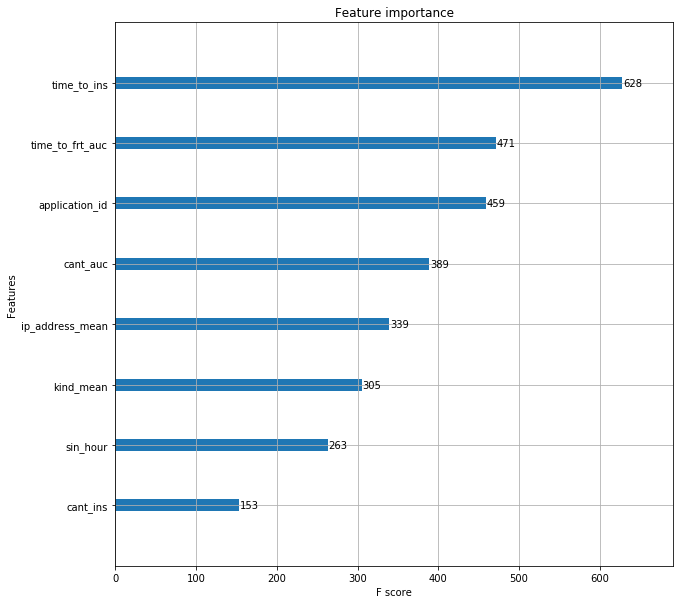

In [272]:
import matplotlib.pyplot as plt
import xgboost as xgb
xgb.plot_importance(mdl_clf)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()